# Agrupamiento - K-Medias

Dataset:
El conjunto de datos “Seeds” describe 210 muestras de granos de trigo, cada una medida con 7 características.

Cada fila corresponde a un grano de trigo y se midieron variables de su geometría a partir de imágenes escaneadas.

🔑 Columnas del dataset



*   Área (A) → Área de la semilla.
*   Perímetro (P) → Longitud del contorno de la semilla.
*   Compacidad (C = 4πA / P²) → Qué tan “compacta” es la semilla (similar a circularidad).
*   Longitud del núcleo (L) → Largo del grano.
*   Ancho del núcleo (W) → Ancho del grano.
*   Coeficiente de asimetría (Asymmetry Coefficient) → Medida de la simetría de la semilla.
*   Longitud del surco del núcleo (Groove Length) → Longitud del surco del grano.
*   Clase (label) → Tipo de trigo (3 variedades distintas).

Para comenzar, ejecute la celda a continuación para cargar nuestros datos.

> **Cita**: El conjunto de datos de semillas utilizado en este ejercicio fue publicado originalmente por el Instituto de Agrofísica de la Academia Polaca de Ciencias en Lublin por Dua, D. y Graff, C. (2019) y puede descargarse del [Repositorio de Aprendizaje Automático de la UCI](http://archive.ics.uci.edu/ml), Universidad de California en Irvine, Facultad de Ciencias de la Información y la Computación.

##Carga de dataset "Semillas"

In [1]:
import pandas as pd

# 📥 Cargar el dataset Seeds desde un archivo CSV en internet
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/seeds.csv
data = pd.read_csv('seeds.csv')

# 🔎 Seleccionar las primeras 6 columnas como características (sin incluir la clase)
# Estas columnas son las medidas de cada semilla (área, perímetro, compacidad, etc.)
features = data[data.columns[0:6]]

# 🎲 Mostrar una muestra aleatoria de 10 semillas con sus características
features.sample(10)


--2025-10-18 21:40:25--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/seeds.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9386 (9.2K) [text/plain]
Saving to: ‘seeds.csv’

seeds.csv           100%[===================>]   9.17K  --.-KB/s    in 0.001s  

2025-10-18 21:40:25 (17.5 MB/s) - ‘seeds.csv’ saved [9386/9386]



,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient
197,13.37,13.78,0.8849,5.320,3.128,4.670
68,14.37,14.39,0.8726,5.569,3.153,1.464
105,18.83,16.29,0.8917,6.037,3.786,2.553
34,15.05,14.68,0.8779,5.712,3.328,2.129
180,11.41,12.95,0.8560,5.090,2.775,4.957
149,10.79,12.93,0.8107,5.317,2.648,5.462
202,11.18,12.72,0.8680,5.009,2.810,4.051
73,19.11,16.26,0.9081,6.154,3.930,2.936
173,11.40,13.08,0.8375,5.136,2.763,5.588
170,11.02,13.00,0.8189,5.325,2.701,6.735


from matplotlib import pyplot as plt
_df_0['area'].plot(kind='hist', bins=20, title='area')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['perimeter'].plot(kind='hist', bins=20, title='perimeter')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['compactness'].plot(kind='hist', bins=20, title='compactness')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['kernel_length'].plot(kind='hist', bins=20, title='kernel_length')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='area', y='perimeter', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='perimeter', y='compactness', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='compactness', y='kernel_length', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='kernel_length', y='kernel_width', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['area'].plot(kind='line', figsize=(8, 4), title='area')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['perimeter'].plot(kind='line', figsize=(8, 4), title='perimeter')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['compactness'].plot(kind='line', figsize=(8, 4), title='compactness')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['kernel_length'].plot(kind='line', figsize=(8, 4), title='kernel_length')
plt.gca().spines[['top', 'right']].set_visible(False)

##Normalización y Transformación

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# ⚖️ Normalizar las características numéricas
# MinMaxScaler lleva cada columna a un rango entre 0 y 1,
# para que todas las variables tengan la misma importancia en el análisis.
scaled_features = MinMaxScaler().fit_transform(features[data.columns[0:6]])

# 📉 Reducir la dimensionalidad con PCA (Análisis de Componentes Principales)
# n_components=2 significa que reduciremos los 6 atributos a 2 componentes principales
# Esto permite visualizar los datos en 2D sin perder demasiada información.
pca = PCA(n_components=2).fit(scaled_features)

# ✨ Transformar los datos escalados en el nuevo espacio de 2 componentes principales
features_2d = pca.transform(scaled_features)

# 👀 Mostrar las 10 primeras semillas representadas en este espacio 2D
# Cada fila ahora tiene solo 2 valores (PC1 y PC2) en lugar de 6 atributos originales
features_2d[0:10]

array([[ 0.11883593, -0.09382469],
       [ 0.0696878 , -0.31077233],
       [-0.03499184, -0.37044705],
       [-0.06582089, -0.36365235],
       [ 0.32594892, -0.37695797],
       [-0.02455447, -0.31060184],
       [-0.00769646, -0.07594931],
       [-0.05646955, -0.26696284],
       [ 0.38196305, -0.05149471],
       [ 0.35701044, -0.17697998]])

## Agrupamiento de K-Medias

El algoritmo que utilizaremos para crear nuestros clústeres de prueba es *K-Medias*. Este es un algoritmo de agrupamiento común que separa un conjunto de datos en *K* clústeres de igual varianza. El número de clústeres, *K*, lo define el usuario. El algoritmo consta de los siguientes pasos:

1. Se selecciona aleatoriamente un conjunto de K centroides.
2. Los clústeres se forman asignando los puntos de datos a su centroide más cercano.
3. Se calcula la media de cada clúster y el centroide se desplaza hasta ella.
4. Los pasos 2 y 3 se repiten hasta que se cumple un criterio de parada. Normalmente, el algoritmo finaliza cuando cada nueva iteración produce un movimiento insignificante de los centroides y los clústeres se vuelven estáticos.
5. Cuando los clústeres dejan de cambiar, el algoritmo ha *convergido*, definiendo sus ubicaciones. Tenga en cuenta que el punto de inicio aleatorio de los centroides implica que volver a ejecutar el algoritmo podría generar clústeres ligeramente diferentes. Por lo tanto, el entrenamiento suele implicar múltiples iteraciones, reinicializando los centroides cada vez, y se selecciona el modelo con la mejor WCSS (suma de cuadrados dentro del clúster).

Intentemos usar K-Means en nuestros datos de semillas con un valor K de 3.

In [4]:
from sklearn.cluster import KMeans

# 🧩 Crear un modelo de K-Means con 3 centroides
# n_clusters=3 → porque sabemos que existen 3 variedades de semillas de trigo
# init='k-means++' → estrategia para inicializar los centroides de forma inteligente,
#                    evitando que caigan muy juntos y mejorando la convergencia.
# n_init=100 → el algoritmo se ejecuta 100 veces con centroides iniciales diferentes
#              y se elige la mejor solución (con menor inercia).
# max_iter=1000 → número máximo de iteraciones por cada ejecución.
model = KMeans(n_clusters=3, init='k-means++', n_init=100, max_iter=1000)

# ⚙️ Ajustar el modelo a los datos (features) y predecir el clúster de cada semilla
# Esto significa que cada fila del dataset es asignada a un grupo (0, 1 o 2)
km_clusters = model.fit_predict(features.values)

# 👀 Ver las asignaciones de clúster
# La salida será un arreglo de números (0, 1 o 2),
# indicando a qué grupo pertenece cada semilla.
km_clusters


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

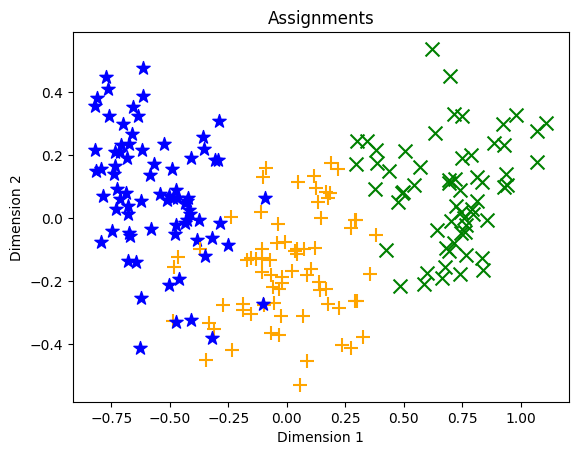

In [5]:
# ============================================================
# 📊 VISUALIZACIÓN DE CLÚSTERES CON K-MEANS
# ============================================================

# Importamos la librería para gráficos
import matplotlib.pyplot as plt

# Esta línea es especial para Jupyter Notebook:
# asegura que los gráficos se muestren justo debajo de la celda donde se ejecuta.
%matplotlib inline

# ------------------------------------------------------------
# Definimos una función para graficar los clústeres encontrados
# ------------------------------------------------------------
def plot_clusters(samples, clusters):
    # Diccionario que asigna un color a cada clúster
    col_dic = {0:'blue', 1:'green', 2:'orange'}
    # Diccionario que asigna un símbolo/forma a cada clúster
    mrk_dic = {0:'*', 1:'x', 2:'+'}

    # Crear una lista de colores según el clúster asignado a cada semilla
    colors = [col_dic[x] for x in clusters]
    # Crear una lista de marcadores según el clúster asignado a cada semilla
    markers = [mrk_dic[x] for x in clusters]

    # 🔄 Dibujar cada semilla en el plano 2D
    for sample in range(len(clusters)):
        plt.scatter(
            samples[sample][0],    # posición en el eje X (1er componente principal)
            samples[sample][1],    # posición en el eje Y (2do componente principal)
            color=colors[sample],  # color de acuerdo al clúster
            marker=markers[sample],# marcador de acuerdo al clúster
            s=100                  # tamaño del punto
        )

    # Etiquetas de los ejes
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    # Título del gráfico
    plt.title('Assignments')
    # Mostrar el gráfico final
    plt.show()

# ------------------------------------------------------------
# 🚀 Llamamos a la función
# ------------------------------------------------------------
# - features_2d: coordenadas en 2D de cada semilla (tras aplicar PCA)
# - km_clusters: grupo asignado por K-Means a cada semilla
plot_clusters(features_2d, km_clusters)



Los datos deben separarse en tres grupos distintos. De lo contrario, repita los dos pasos anteriores.

¿Cuál es la utilidad práctica de la agrupación en clústeres? En algunos casos, tendrá datos que necesita agrupar en grupos distintos sin saber cuántos hay ni qué indican. Por ejemplo, una organización de marketing podría querer separar a los clientes en segmentos distintos y luego investigar cómo esos segmentos muestran diferentes comportamientos de compra.

A veces, la agrupación en clústeres se utiliza como primer paso para crear un modelo de clasificación. Se empieza por identificar grupos distintos de puntos de datos y luego se asignan etiquetas de clase a esos grupos. Después, se pueden usar estos datos etiquetados para entrenar un modelo de clasificación.

En el caso de los datos de semillas, las diferentes especies de semillas ya se conocen y están codificadas como 0 (*Kama*), 1 (*Rosa*) o 2 (*Canadian*), por lo que podemos usar estos identificadores para comparar las clasificaciones de especies con los grupos identificados por nuestro algoritmo no supervisado.

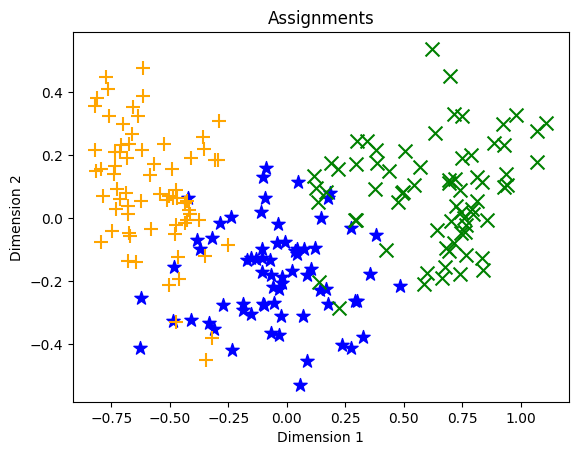

In [6]:
# ------------------------------------------------------------
# Extraer la columna con la especie real de cada semilla
# ------------------------------------------------------------
seed_species = data[data.columns[7]]
# - data.columns[7] → corresponde a la columna "class" del dataset seeds.csv.
# - Esa columna indica la variedad real de trigo (3 clases distintas).
# - Guardamos esa información en la variable seed_species.

# ------------------------------------------------------------
# Graficar las semillas según su especie real
# ------------------------------------------------------------
plot_clusters(features_2d, seed_species.values)
# - features_2d → las semillas proyectadas en 2 dimensiones (con PCA).
# - seed_species.values → la etiqueta real de cada semilla (1, 2 o 3).
#   👉 Esto reemplaza los clústeres predichos por K-Means.
#   👉 El gráfico mostrará cómo se distribuyen las especies reales en el plano 2D.


##Resultados

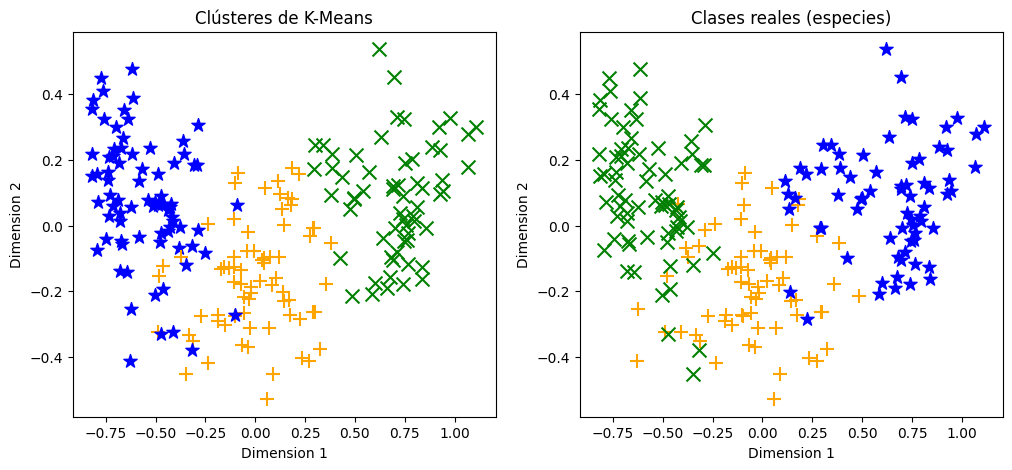

In [7]:
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# Función para graficar dos comparaciones lado a lado
# ------------------------------------------------------------
def compare_clusters(samples, km_clusters, true_labels):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 fila, 2 columnas de gráficos

    # Diccionario de colores (mismos en ambos gráficos para comparar)
    col_dic = {0:'blue', 1:'green', 2:'orange'}
    mrk_dic = {0:'*', 1:'x', 2:'+'}

    # ----------- Gráfico 1: Asignaciones de K-Means -----------
    for sample in range(len(km_clusters)):
        axes[0].scatter(samples[sample, 0], samples[sample, 1],
                        color=col_dic[km_clusters[sample] % 3],  # usamos %3 para mapear colores
                        marker=mrk_dic[km_clusters[sample] % 3],
                        s=100)
    axes[0].set_title("Clústeres de K-Means")
    axes[0].set_xlabel("Dimension 1")
    axes[0].set_ylabel("Dimension 2")

    # ----------- Gráfico 2: Clases reales -----------
    for sample in range(len(true_labels)):
        axes[1].scatter(samples[sample, 0], samples[sample, 1],
                        color=col_dic[(true_labels[sample]-1) % 3],  # -1 porque clases son 1,2,3
                        marker=mrk_dic[(true_labels[sample]-1) % 3],
                        s=100)
    axes[1].set_title("Clases reales (especies)")
    axes[1].set_xlabel("Dimension 1")
    axes[1].set_ylabel("Dimension 2")

    plt.show()

# 🚀 Llamar a la función con:
# - features_2d: semillas en 2D (tras PCA)
# - km_clusters: grupos encontrados por K-Means
# - seed_species.values: etiquetas reales de las semillas
compare_clusters(features_2d, km_clusters, seed_species.values)


Puede haber algunas diferencias entre las asignaciones de grupos y las etiquetas de clase, pero el modelo K-Means debería haber hecho un trabajo razonable de agrupamiento de las observaciones de modo que las semillas de la misma especie estén generalmente en el mismo grupo.